# 1 Mounted Google Drive (For Saving Data & Code)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 2 Clone the MediFly Repositor

In [ ]:
!git clone https://github.com/MEDIFLY/MediflySoftwarePrototype.git


Cloning into 'MediflySoftwarePrototype'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


# 3 Verifying Folder Location

In [ ]:
!ls MediflySoftwarePrototype


README.md


In [ ]:
import os

# Navigate to your cloned repository folder
repo_path = "/content/MediflySoftwarePrototype"
os.chdir(repo_path)

# List the contents
print("Files and directories in MediflySoftwarePrototype:")
print(os.listdir())


Files and directories in MediflySoftwarePrototype:
['README.md', '.git']


# Pre-Flight Setup (4 Modules)

# 4 Medifly Dashboard

In [ ]:
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets
import random

# ----------------- Helper Function: Drone Status Animation -----------------
def drone_animation(status):
    emoji = "🛸"
    if status == "takeoff":
        return f"{emoji} 🔼 Taking Off..."
    elif status == "land":
        return f"{emoji} 🔽 Landing..."
    elif status == "navigate":
        return f"{emoji} 🧭 Navigating..."
    elif status == "drop":
        return f"{emoji} 🎯 Dropping Payload!"
    elif status == "capture":
        return f"{emoji} 📸 Capturing Image..."
    elif status == "record":
        return f"{emoji} 🎥 Recording..."
    elif status == "stop":
        return f"{emoji} ⛔ EMERGENCY STOP!"
    else:
        return f"{emoji} ⚙️ Working..."

# ----------------- Function: HOMEPAGE -----------------
def show_homepage():
    clear_output()
    title = HTML("<h1 style='color:#1D3557;'>🚁 Medifly Drone Interface</h1>")
    subtitle = HTML("<h3 style='color:#457B9D;'>Created by Harisha & Team</h3>")
    start_button = widgets.Button(description="Launch Control Panel", button_style='success')
    start_button.on_click(open_control_panel)
    display(title, subtitle, widgets.HTML("<br>"), start_button)

# ----------------- Function: CONTROL PANEL -----------------
def open_control_panel(b=None):
    clear_output()
    display(HTML("<h2 style='color:#1D3557;'>🕹️ Drone Control Panel</h2>"))

    # Buttons
    takeoff_btn = widgets.Button(description="🚀 Take Off", button_style='info')
    land_btn = widgets.Button(description="🛬 Land", button_style='warning')
    capture_btn = widgets.Button(description="📸 Capture Image", button_style='primary')
    nav_btn = widgets.Button(description="🧭 Navigate", button_style='success')
    drop_btn = widgets.Button(description="🎯 Drop Payload", button_style='success')
    record_btn = widgets.Button(description="🎥 Start Video", button_style='danger')
    stop_btn = widgets.Button(description="⛔ STOP", button_style='danger')
    ai_btn = widgets.Button(description="🧠 AI Decision", button_style='primary')
    back_btn = widgets.Button(description="🏠 Return to Homepage")

    output = widgets.Output()

    # Action handler
    def handle_action(text, emoji_key):
        with output:
            output.clear_output()
            print(f"[ACTION] {drone_animation(emoji_key)}")

    # Drop payload simulation
    def drop_payload(b):
        location = random.choice(["Safe Zone", "Windy Area", "Moving Target"])
        with output:
            output.clear_output()
            if location == "Safe Zone":
                print(f"🎯 Payload dropped at accurate location! [{location}]")
            else:
                print(f"⚠️ AI flagged {location}. Retrying or redirecting...")

    # AI decision simulation
    def ai_decision(b):
        decision = random.choice(["Drop Approved ✅", "Hold – Obstacle Ahead ⛔", "Re-route ↪️"])
        with output:
            output.clear_output()
            print(f"🧠 AI Decision: {decision}")

    # Link buttons to actions
    takeoff_btn.on_click(lambda b: handle_action("Take Off", "takeoff"))
    land_btn.on_click(lambda b: handle_action("Land", "land"))
    capture_btn.on_click(lambda b: handle_action("Capture Image", "capture"))
    nav_btn.on_click(lambda b: handle_action("Navigate", "navigate"))
    record_btn.on_click(lambda b: handle_action("Start Video", "record"))
    stop_btn.on_click(lambda b: handle_action("EMERGENCY STOP", "stop"))
    back_btn.on_click(lambda b: show_homepage())
    drop_btn.on_click(drop_payload)
    ai_btn.on_click(ai_decision)

    # Layout
    display(widgets.VBox([
        widgets.HBox([takeoff_btn, land_btn]),
        widgets.HBox([capture_btn, nav_btn]),
        widgets.HBox([drop_btn, ai_btn]),
        widgets.HBox([record_btn, stop_btn]),
        back_btn,
        widgets.HTML("<hr>"),
        output
    ]))

# ----------------- Run Dashboard -----------------
show_homepage()


HTML(value='<br>')

Button(button_style='success', description='Launch Control Panel', style=ButtonStyle())

# 1.1 User_Interface_and_Mission_Control_Dashboard

In [ ]:
# Run this cell first
from IPython.display import display, clear_output
import ipywidgets as widgets
import time
import matplotlib.pyplot as plt
import numpy as np

# Helper: show drone animation
def show_drone_action(title="Drone in Action", path_color='blue'):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 5)
    ax.set_title(title)

    for x in range(11):
        ax.clear()
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 5)
        ax.set_title(title)
        ax.plot(x, 2.5, marker="o", markersize=20, color=path_color)
        display(fig)
        plt.pause(0.2)
        clear_output(wait=True)
    plt.close()

# Go back to dashboard
def back_to_dashboard(b=None):
    clear_output(wait=True)
    print("MediFly Control Panel")
    display(button_box)

# Show action + back button
def show_status(action_text, animation=False, color='green'):
    clear_output(wait=True)
    print(f">>> {action_text}")
    if animation:
        show_drone_action(title=action_text, path_color=color)
    else:
        print("")

    # Back to dashboard button
    back_btn = widgets.Button(description="Back to Dashboard", button_style='warning')
    back_btn.on_click(back_to_dashboard)
    display(back_btn)

# Button actions
def takeoff(b): show_status("Taking Off...", animation=True, color='blue')
def ccc_mode(b): show_status("3C Mode Activated: Command | Control | Communication", animation=False)
def payload_drop(b): show_status("Payload Dropped Successfully", animation=True, color='orange')
def ai_decision(b): show_status("AI Decision: Avoiding Obstacle - Route Adjusted", animation=False)
def aerial_drop(b): show_status("Precise Aerial Drop Completed", animation=True, color='purple')
def landing(b): show_status("Landing Completed Safely", animation=True, color='green')
def human_detect(b): show_status("Human Detected using AI Vision", animation=False)
def fix_target(b): show_status("Target Fixed Successfully", animation=False)
def drop_point_calc(b): show_status("Drop Point Calculated Using GPS + AI", animation=False)
def wind_predict(b): show_status("Wind Prediction: Mild, Adjusting Flight Path", animation=False)

# Splash screen
splash_text = widgets.HTML("<h2>MediFly Project</h2><p>Created by Team</p>")
launch_button = widgets.Button(description="Launch Dashboard", button_style='success')
launch_button.on_click(back_to_dashboard)

# Define buttons
buttons = [
    ("Takeoff", takeoff),
    ("3C Mode", ccc_mode),
    ("Payload Drop", payload_drop),
    ("AI Decision Making", ai_decision),
    ("Precision Aerial Drop", aerial_drop),
    ("Landing", landing),
    ("Human Detection", human_detect),
    ("Fix Target", fix_target),
    ("Drop Point Calc", drop_point_calc),
    ("Wind Prediction", wind_predict),
]

button_widgets = [widgets.Button(description=name, layout=widgets.Layout(width='250px'), button_style='info') for name, _ in buttons]

# Add callbacks
for widget, (_, func) in zip(button_widgets, buttons):
    widget.on_click(func)

button_box = widgets.VBox([
    widgets.HTML("<h3>Select an Action:</h3>"),
    *button_widgets
])

# Show initial splash
display(splash_text, launch_button)


MediFly Control Panel


# Input Parameters

In [ ]:
# ✅ Mission Control Dashboard for Pre-Flight Setup

def mission_control_dashboard():
    print("🌍 Welcome to the MEDIFLY Mission Control Dashboard")

    # Input Mission Parameters
    target_altitude = float(input("Enter target altitude (m): "))
    weather_condition = input("Enter weather condition (clear, windy, stormy): ").lower()
    flight_mode = input("Enter flight mode (manual/auto): ").lower()

    # Display Mission Parameters
    print("\n📝 Mission Parameters:")
    print(f"Target Altitude: {target_altitude} m")
    print(f"Weather Condition: {weather_condition}")
    print(f"Flight Mode: {flight_mode}")

    return target_altitude, weather_condition, flight_mode

# Call the Mission Control Dashboard function
target_altitude, weather_condition, flight_mode = mission_control_dashboard()


🌍 Welcome to the MEDIFLY Mission Control Dashboard
Enter target altitude (m): 15
Enter weather condition (clear, windy, stormy): clear
Enter flight mode (manual/auto): manual

📝 Mission Parameters:
Target Altitude: 15.0 m
Weather Condition: clear
Flight Mode: manual


# Real time Drone Takeoff Simulation

In [ ]:
import time  # For simulating real-time updates

# ✅ 1. Drone Parameters
DRONE_MASS = 3.0  # kg
GRAVITY = 9.81  # m/s²
MAX_THRUST = 15  # N
BATTERY_CAPACITY = 100  # Full charge %

# ✅ 2. Initial Position (x, y, z)
drone_position = {"x": 0.0, "y": 0.0, "z": 0.0}
drone_velocity = {"vx": 0.0, "vy": 0.0, "vz": 0.0}

# ✅ 3. Takeoff Parameters
TARGET_ALTITUDE = 10  # Target height in meters
TAKEOFF_SPEED = 2  # m/s

# ✅ 4. Drone State Initialization
drone_state = {
    "altitude": 0.0,
    "thrust": 0.0,
    "battery": BATTERY_CAPACITY
}

# ✅ 5. Takeoff Loop
def takeoff():
    print("🚀 Drone Takeoff Initiated...")
    while drone_state["altitude"] < TARGET_ALTITUDE:
        # Calculate thrust required
        drone_state["thrust"] = DRONE_MASS * GRAVITY * 1.2  # Adding extra thrust for takeoff

        # Simulate altitude increase
        drone_state["altitude"] += TAKEOFF_SPEED

        # Reduce battery usage
        drone_state["battery"] -= 0.5  # 0.5% per second

        # Print status
        print(f"🔹 Altitude: {drone_state['altitude']}m | Battery: {drone_state['battery']}%")

        time.sleep(1)  # Simulating real-time takeoff

    print("✅ Drone has reached the target altitude!")

# Run takeoff function
takeoff()

🚀 Drone Takeoff Initiated...
🔹 Altitude: 2.0m | Battery: 99.5%
🔹 Altitude: 4.0m | Battery: 99.0%
🔹 Altitude: 6.0m | Battery: 98.5%
🔹 Altitude: 8.0m | Battery: 98.0%
🔹 Altitude: 10.0m | Battery: 97.5%
✅ Drone has reached the target altitude!


# Smooth UAV Takeoff with Kalman Filter Fusion

<ipython-input-10-085074c35b51>:72: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


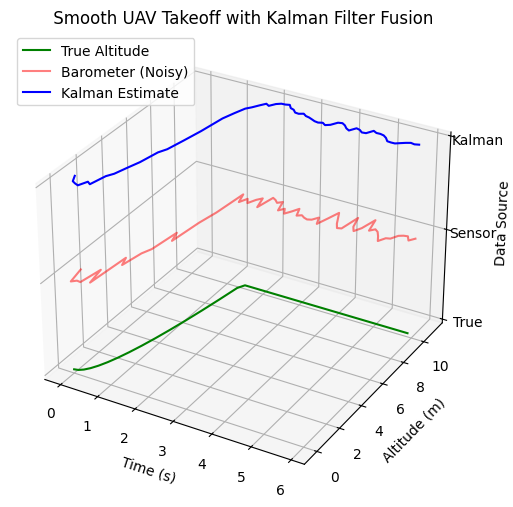

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulation Constants
GRAVITY = 9.81  # m/s²
DRONE_MASS = 3.0  # kg
TARGET_ALTITUDE = 10.0  # meters
TIME_STEP = 0.1  # seconds
SIM_DURATION = 6  # total time in seconds

# Kalman Filter Configuration
def kalman_filter(z, x_prev, P_prev, A, H, Q, R):
    x_pred = A @ x_prev
    P_pred = A @ P_prev @ A.T + Q

    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
    x_updated = x_pred + K @ (z - H @ x_pred)
    P_updated = (np.eye(len(K)) - K @ H) @ P_pred

    return x_updated, P_updated

# Initialize time and variables
time_vals = np.arange(0, SIM_DURATION, TIME_STEP)
n = len(time_vals)

true_altitudes = GRAVITY * 0.5 * time_vals**2
true_altitudes = np.clip(true_altitudes, 0, TARGET_ALTITUDE)

# Simulated noisy barometer readings
np.random.seed(1)
baro_noise = np.random.normal(0, 0.5, n)  # Reduced noise
baro_readings = true_altitudes + baro_noise

# Kalman Filter Matrices
A = np.array([[1, TIME_STEP], [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[0.05, 0], [0, 0.01]])
R = np.array([[0.3]])

x_est = np.array([[0], [0]])
P_est = np.eye(2)

kalman_altitudes = []
true_path = []
baro_path = []

for i in range(n):
    z = np.array([[baro_readings[i]]])
    x_est, P_est = kalman_filter(z, x_est, P_est, A, H, Q, R)
    kalman_altitudes.append(x_est[0, 0])
    true_path.append(true_altitudes[i])
    baro_path.append(baro_readings[i])

# 📈 3D Plot of Flight Stability: True vs Sensor vs Kalman Estimate
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(time_vals, true_path, zs=0, zdir='z', label='True Altitude', color='green')
ax.plot(time_vals, baro_path, zs=1, zdir='z', label='Barometer (Noisy)', color='red', alpha=0.5)
ax.plot(time_vals, kalman_altitudes, zs=2, zdir='z', label='Kalman Estimate', color='blue')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (m)')
ax.set_zlabel('Data Source')
ax.set_zticks([0, 1, 2])
ax.set_zticklabels(['True', 'Sensor', 'Kalman'])

ax.set_title(" Smooth UAV Takeoff with Kalman Filter Fusion")
ax.legend()

plt.tight_layout()
plt.show()


# 1.2 AI_Based_UAV_Flight_Path_Planning

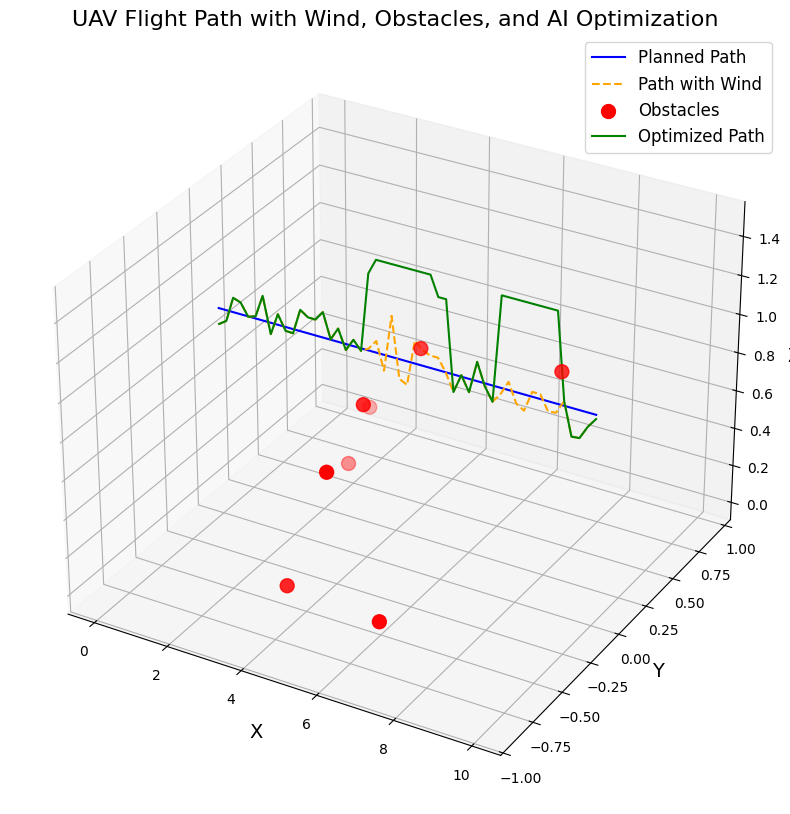

In [ ]:
# prompt:  AI-Based UAV Flight Path Planning (Next Task)
# Simulate 3D flight path using Matplotlib.
# AI-based path optimization (A, Reinforcement Learning).*
# Wind effects & obstacle detection. i need optimised path in a straigfht line manuy obstaclets in planned path and wind

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample UAV flight path (straight line)
x = np.linspace(0, 10, 50)
y = np.zeros(50)  # Straight line along the x-axis
z = np.ones(50)   # Constant altitude

# Simulate wind effect
wind_effect = 0.1 * np.random.randn(len(z))
z_with_wind = z + wind_effect

# Generate obstacles
obstacle_x = np.random.uniform(1, 9, 8)
obstacle_y = np.random.uniform(-1, 1, 8)
obstacle_z = np.random.uniform(0, 1, 8)

# Create 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot planned path
ax.plot(x, y, z, label='Planned Path', color='blue')

# Plot path with wind effect
ax.plot(x, y, z_with_wind, label='Path with Wind', color='orange', linestyle='--')

# Plot obstacles
ax.scatter(obstacle_x, obstacle_y, obstacle_z, color='red', marker='o', s=100, label='Obstacles')

# AI-based path optimization (example: adjust z-coordinate to avoid obstacles)
z_optimized = np.copy(z_with_wind)
for i in range(len(x)):
    for j in range(len(obstacle_x)):
        if np.abs(x[i] - obstacle_x[j]) < 0.8 and np.abs(y[i] - obstacle_y[j]) < 0.8:
            z_optimized[i] = max(z_optimized[i], obstacle_z[j] + 0.5)

ax.plot(x, y, z_optimized, label='Optimized Path', color='green')

# Labels, title, legend
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('Z', fontsize=14)
ax.set_title('UAV Flight Path with Wind, Obstacles, and AI Optimization', fontsize=16)
ax.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
import random

# ✅ AI-Based UAV Flight Path Planning (Advanced version)

def ai_flight_path_planning(target_altitude, weather_condition):
    print("\n🔍 AI is calculating the optimal flight path...")

    # AI-based flight path logic (mocked for simplicity)
    if weather_condition == "clear":
        flight_path = "Direct route, no obstacles"
    elif weather_condition == "windy":
        flight_path = "Route adjusted for wind conditions"
    else:  # stormy
        flight_path = "Route adjusted for turbulence and safety"

    # Simulating different flight durations based on weather
    flight_duration = random.uniform(30, 60)  # Mock flight time in minutes

    print(f"Flight Path: {flight_path}")
    print(f"Estimated Flight Duration: {flight_duration:.2f} minutes")
    return flight_path, flight_duration

# Call the Flight Path Planning AI function
flight_path, flight_duration = ai_flight_path_planning(target_altitude, weather_condition)



🔍 AI is calculating the optimal flight path...
Flight Path: Direct route, no obstacles
Estimated Flight Duration: 37.72 minutes


In [ ]:
# Example: define weather_condition manually
weather_condition = "clear"  # or "windy", "stormy"

# Define the prediction function
def weather_prediction(weather_condition):
    print(f"🌤️ Predicting UAV behavior for weather: {weather_condition}")
    if weather_condition == "clear":
        prediction = "Stable flight with minimal adjustments."
    elif weather_condition == "windy":
        prediction = "Adjusting flight path dynamically for wind."
    elif weather_condition == "stormy":
        prediction = "Severe adjustments, caution recommended."
    else:
        prediction = "Unknown weather condition."

    print(f"📡 AI Prediction: {prediction}")
    return prediction

# Call the function
weather_prediction_output = weather_prediction(weather_condition)


🌤️ Predicting UAV behavior for weather: clear
📡 AI Prediction: Stable flight with minimal adjustments.


# 1.3 AI_Based_Environmental_Adaptation_and_Weather_Prediction

In [ ]:
import time
import numpy as np
import random

# Initialize Drone Parameters
drone_position = {"x": 0, "y": 0, "z": 0}  # Initial Position
drone_velocity = {"vx": 0, "vy": 0, "vz": 0}  # Initial Velocity
drone_thrust = 0  # Initial Thrust

# Constants for Simulation
GRAVITY = 9.81  # m/s^2
MASS = 2.5  # kg (Drone + Payload)
THRUST_MAX = 15  # Max thrust in Newtons

# Environmental Conditions
sensor_data = {
    "Temperature (°C)": 0,
    "Humidity (%)": 0,
    "Wind Speed (m/s)": 0,
    "Air Quality (AQI)": 0,
}

# Function to Simulate Thrust Calculation
def calculate_thrust(target_altitude):
    global drone_thrust
    thrust_required = MASS * GRAVITY
    if drone_position["z"] < target_altitude:
        drone_thrust = min(thrust_required + 5, THRUST_MAX)  # Increase thrust
    else:
        drone_thrust = thrust_required  # Maintain hover
    return drone_thrust

# Function to Update Drone State
def update_drone_state(time_step):
    global drone_position, drone_velocity
    drone_velocity["vz"] += (drone_thrust / MASS - GRAVITY) * time_step
    drone_position["z"] += drone_velocity["vz"] * time_step
    drone_position["z"] = max(0, drone_position["z"])  # Prevent negative altitude

# Function to Print Drone State
def print_drone_state():
    print(f"Drone State -> Position: {drone_position}, Velocity: {drone_velocity}, Thrust: {drone_thrust}N")

# Function to Simulate Sensor Readings
def update_sensor_readings():
    sensor_data["Temperature (°C)"] = round(random.uniform(15, 35), 2)
    sensor_data["Humidity (%)"] = round(random.uniform(30, 90), 2)
    sensor_data["Wind Speed (m/s)"] = round(random.uniform(0, 15), 2)
    sensor_data["Air Quality (AQI)"] = round(random.uniform(50, 150), 2)

# Function to Print Sensor Readings
def print_sensor_readings():
    print(f"Sensor Readings -> {sensor_data}")

# Simulate Drone Takeoff and Environmental Monitoring
target_altitude = 10  # Target altitude in meters
time_step = 0.5  # Time interval in seconds

print("🚀 Starting Drone Takeoff & Environmental Monitoring...\n")
for i in range(10):  # Run for 10 iterations
    calculate_thrust(target_altitude)
    update_drone_state(time_step)
    update_sensor_readings()
    print_drone_state()
    print_sensor_readings()
    print("-" * 50)
    time.sleep(time_step)  # Simulate real-time delay

print("✅ Drone Takeoff & Environmental Monitoring Completed!")

🚀 Starting Drone Takeoff & Environmental Monitoring...

Drone State -> Position: {'x': 0, 'y': 0, 'z': 0}, Velocity: {'vx': 0, 'vy': 0, 'vz': -1.9050000000000002}, Thrust: 15N
Sensor Readings -> {'Temperature (°C)': 26.7, 'Humidity (%)': 56.99, 'Wind Speed (m/s)': 12.86, 'Air Quality (AQI)': 113.31}
--------------------------------------------------
Drone State -> Position: {'x': 0, 'y': 0, 'z': 0}, Velocity: {'vx': 0, 'vy': 0, 'vz': -3.8100000000000005}, Thrust: 15N
Sensor Readings -> {'Temperature (°C)': 23.04, 'Humidity (%)': 64.27, 'Wind Speed (m/s)': 1.74, 'Air Quality (AQI)': 54.43}
--------------------------------------------------
Drone State -> Position: {'x': 0, 'y': 0, 'z': 0}, Velocity: {'vx': 0, 'vy': 0, 'vz': -5.715000000000001}, Thrust: 15N
Sensor Readings -> {'Temperature (°C)': 28.65, 'Humidity (%)': 62.42, 'Wind Speed (m/s)': 5.81, 'Air Quality (AQI)': 119.78}
--------------------------------------------------
Drone State -> Position: {'x': 0, 'y': 0, 'z': 0}, Velocit

## 1.4 Advanced_Predictive_Modeling_for_UAVs

In [ ]:
# Install requirements
!pip install scikit-learn matplotlib

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Simulated flight data (features: battery, wind, temperature, motor_vibration)
np.random.seed(42)
n = 500
data = pd.DataFrame({
    'battery_level': np.random.randint(30, 100, size=n),
    'wind_speed': np.random.randint(0, 50, size=n),
    'temperature': np.random.randint(-10, 50, size=n),
    'motor_vibration': np.random.normal(0.5, 0.1, size=n),
    'disruption': np.random.choice([0, 1], size=n, p=[0.85, 0.15])  # 1 = issue
})

# Model Training
X = data.drop('disruption', axis=1)
y = data['disruption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Simulate Real-time Input
def simulate_real_time_prediction():
    new_data = pd.DataFrame([{
        'battery_level': np.random.randint(20, 100),
        'wind_speed': np.random.randint(0, 60),
        'temperature': np.random.randint(-15, 45),
        'motor_vibration': np.random.normal(0.5, 0.1),
    }])
    prediction = model.predict(new_data)[0]
    print(f"\n📡 Real-Time Telemetry: \n{new_data}")
    if prediction == 1:
        print("⚠️ Disruption Likely! Adapting flight path...")
    else:
        print("✅ All systems stable.")

# Run simulation
simulate_real_time_prediction()


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        89
           1       0.00      0.00      0.00        11

    accuracy                           0.87       100
   macro avg       0.44      0.49      0.47       100
weighted avg       0.79      0.87      0.83       100


📡 Real-Time Telemetry: 
   battery_level  wind_speed  temperature  motor_vibration
0             72          23           -1         0.606021
✅ All systems stable.


# Takeoff (2 Modules)

# 2.1 Flight_Controller_Coding_and_UAV_System_Integration

 AI-Stabilized Lift-Off Sequence...

[ESC] Motors stabilized at speed: 84.6
[ESC] Motors stabilized at speed: 84.2
[ESC] Motors stabilized at speed: 83.8
[ESC] Motors stabilized at speed: 83.4
[ESC] Motors stabilized at speed: 83.0
[ESC] Motors stabilized at speed: 82.6
[ESC] Motors stabilized at speed: 82.2
[ESC] Motors stabilized at speed: 81.8
[ESC] Motors stabilized at speed: 81.4
[ESC] Motors stabilized at speed: 81.0
[ESC] Motors stabilized at speed: 80.6
[ESC] Motors stabilized at speed: 80.2
[ESC] Motors stabilized at speed: 79.8
[ESC] Motors stabilized at speed: 79.4
[ESC] Motors stabilized at speed: 79.0
[ESC] Motors stabilized at speed: 78.6
[ESC] Motors stabilized at speed: 78.2
[ESC] Motors stabilized at speed: 77.8
[ESC] Motors stabilized at speed: 77.4
[ESC] Motors stabilized at speed: 77.0
[ESC] Motors stabilized at speed: 76.6
[ESC] Motors stabilized at speed: 76.2
[ESC] Motors stabilized at speed: 75.8
[ESC] Motors stabilized at speed: 75.4
[ESC] Motors stabilized at 

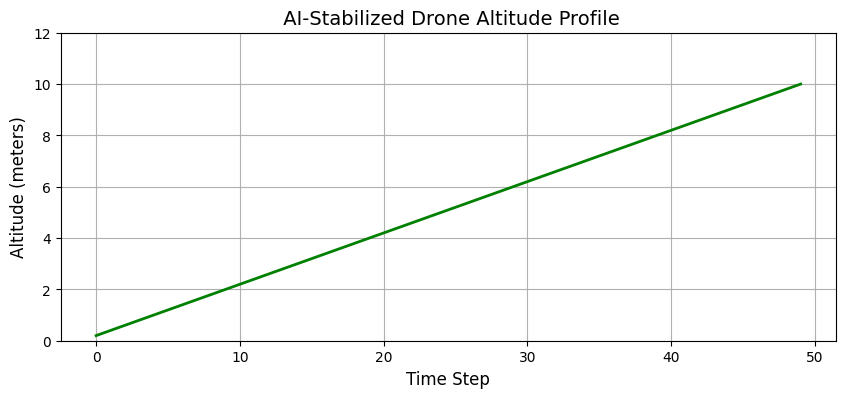

AI-Stabilized Lift-Off Sequence...

[ESC] Motors stabilized at speed: 84.6
[ESC] Motors stabilized at speed: 84.2
[ESC] Motors stabilized at speed: 83.8
[ESC] Motors stabilized at speed: 83.4
[ESC] Motors stabilized at speed: 83.0
[ESC] Motors stabilized at speed: 82.6
[ESC] Motors stabilized at speed: 82.2
[ESC] Motors stabilized at speed: 81.8
[ESC] Motors stabilized at speed: 81.4
[ESC] Motors stabilized at speed: 81.0
[ESC] Motors stabilized at speed: 80.6
[ESC] Motors stabilized at speed: 80.2
[ESC] Motors stabilized at speed: 79.8
[ESC] Motors stabilized at speed: 79.4
[ESC] Motors stabilized at speed: 79.0
[ESC] Motors stabilized at speed: 78.6
[ESC] Motors stabilized at speed: 78.2
[ESC] Motors stabilized at speed: 77.8
[ESC] Motors stabilized at speed: 77.4
[ESC] Motors stabilized at speed: 77.0
[ESC] Motors stabilized at speed: 76.6
[ESC] Motors stabilized at speed: 76.2
[ESC] Motors stabilized at speed: 75.8
[ESC] Motors stabilized at speed: 75.4
[ESC] Motors stabilized at s

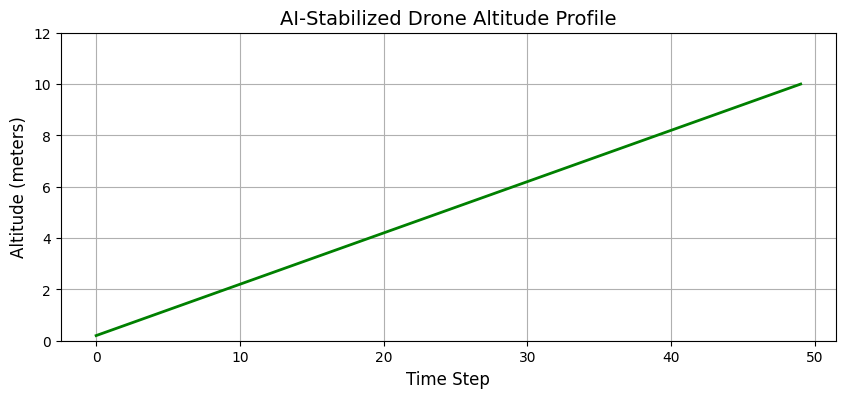

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Simulated AI-stabilized altitude model
class AIDecisionModel:
    def __init__(self):
        self.current_altitude = 0

    def predict_next_altitude(self, target, step=0.2):
        # Move smoothly toward target
        if self.current_altitude < target:
            self.current_altitude += step
        elif self.current_altitude > target:
            self.current_altitude -= step
        return round(self.current_altitude, 2)

# Dummy ESC controller
class ESCController:
    def set_motor_speeds(self, speeds):
        print(f"[ESC] Motors stabilized at speed: {speeds}")

# Flight Controller with AI-stable decision
class StableFlightController:
    def __init__(self):
        self.altitudes = []
        self.target_altitude = 10  # meters
        self.esc = ESCController()
        self.ai_model = AIDecisionModel()

    def simulate_smooth_liftoff(self):
        print("AI-Stabilized Lift-Off Sequence...\n")
        for t in range(50):
            altitude = self.ai_model.predict_next_altitude(self.target_altitude)
            self.altitudes.append(altitude)
            self.esc.set_motor_speeds(65 + 2 * (self.target_altitude - altitude))  # adaptive speed
            time.sleep(0.05)

        # Plot smooth altitude profile
        plt.figure(figsize=(10, 4))
        plt.plot(self.altitudes, color='green', linewidth=2)
        plt.title("AI-Stabilized Drone Altitude Profile", fontsize=14)
        plt.xlabel("Time Step", fontsize=12)
        plt.ylabel("Altitude (meters)", fontsize=12)
        plt.ylim(0, self.target_altitude + 2)
        plt.grid(True)
        plt.show()

# Run simulation
drone = StableFlightController()
drone.simulate_smooth_liftoff()


# 2.2 Sensor_Fusion_and_Kalman_Filters_for_Flight_Stability

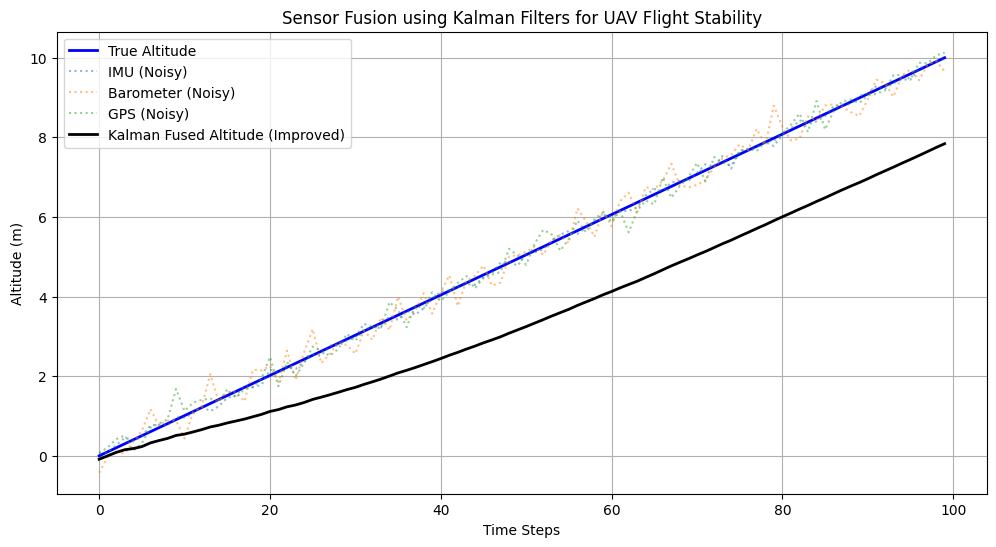

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated true altitude values
np.random.seed(42)
time_steps = 100
true_altitude = np.linspace(0, 10, time_steps)  # Actual smooth ascent

# Simulate noisy sensor readings
imu_noise = np.random.normal(0, 0.1, time_steps)      # Reduced IMU noise
barometer_noise = np.random.normal(0, 0.3, time_steps) # Reduced barometer noise
gps_noise = np.random.normal(0, 0.2, time_steps)       # Reduced GPS noise

imu_data = true_altitude + imu_noise
barometer_data = true_altitude + barometer_noise
gps_data = true_altitude + gps_noise

# Improved Kalman Filter function
def kalman_filter(z, Q=1e-4, R=0.05):  # Adjusted Q and R values
    x_est = np.zeros_like(z)
    P = 1.0
    x = z[0]

    for k in range(len(z)):
        x_pred = x
        P_pred = P + Q
        K = P_pred / (P_pred + R)
        x = x_pred + K * (z[k] - x_pred)
        P = (1 - K) * P_pred
        x_est[k] = x

    return x_est

# Apply Kalman filter to each sensor
kf_imu = kalman_filter(imu_data, Q=1e-4, R=0.05)
kf_barometer = kalman_filter(barometer_data, Q=1e-4, R=0.05)
kf_gps = kalman_filter(gps_data, Q=1e-4, R=0.05)

# Improved Fused estimate (weighted combination)
fused_altitude = (0.4 * kf_imu + 0.3 * kf_barometer + 0.3 * kf_gps)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(true_altitude, label='True Altitude', linewidth=2, color='blue')
plt.plot(imu_data, label='IMU (Noisy)', linestyle='dotted', alpha=0.5)
plt.plot(barometer_data, label='Barometer (Noisy)', linestyle='dotted', alpha=0.5)
plt.plot(gps_data, label='GPS (Noisy)', linestyle='dotted', alpha=0.5)
plt.plot(fused_altitude, label='Kalman Fused Altitude (Improved)', color='black', linewidth=2)
plt.title("Sensor Fusion using Kalman Filters for UAV Flight Stability")
plt.xlabel("Time Steps")
plt.ylabel("Altitude (m)")
plt.grid(True)
plt.legend()
plt.show()


# Mid-Flight Navigation (5 Modules)

# 3.1 ANN_Based_Trajectory_Optimization

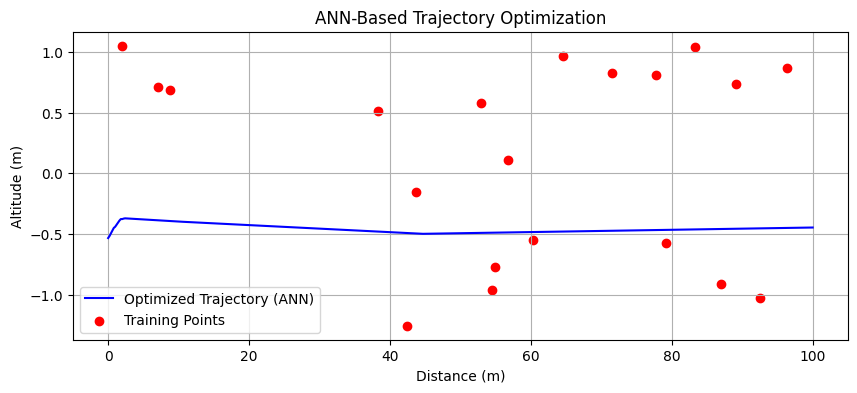

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Generate sample waypoints
np.random.seed(0)
X = np.sort(np.random.rand(20, 1) * 100, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Simulated terrain influence

# Train ANN
ann = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=1000)
ann.fit(X, y)

# Predict trajectory
X_test = np.linspace(0, 100, 500).reshape(-1, 1)
y_pred = ann.predict(X_test)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(X_test, y_pred, label="Optimized Trajectory (ANN)", color='blue')
plt.scatter(X, y, color='red', label="Training Points")
plt.title("ANN-Based Trajectory Optimization")
plt.xlabel("Distance (m)")
plt.ylabel("Altitude (m)")
plt.legend()
plt.grid(True)
plt.show()


# 3.2 Multi_Agent_System_MAS_for_Mission_Optimization

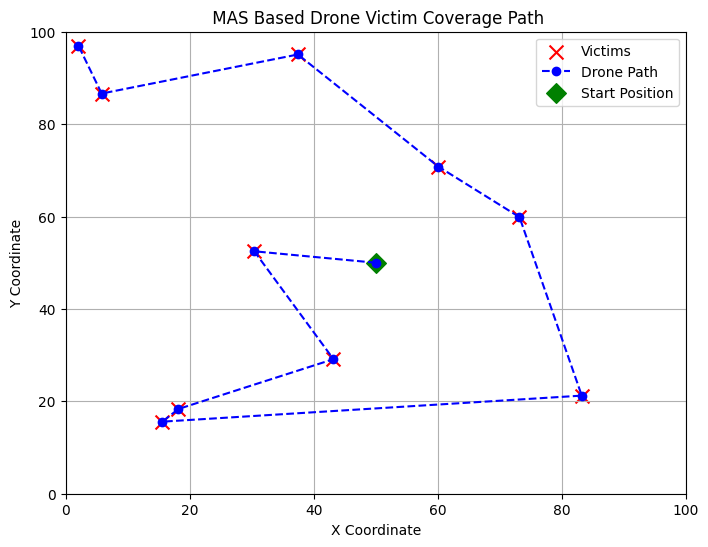

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Configuration
num_victims = 10
np.random.seed(42)

# Generate random victim locations and starting drone position
victims = np.random.rand(num_victims, 2) * 100
drone_position = np.array([50, 50])  # Start from center
path = [drone_position.copy()]
visited = []

# Nearest Neighbor path planning
while len(visited) < len(victims):
    remaining = [v for i, v in enumerate(victims) if i not in visited]
    distances = cdist([drone_position], remaining)[0]
    nearest_index = np.argmin(distances)
    global_index = [i for i in range(num_victims) if i not in visited][nearest_index]
    drone_position = victims[global_index]
    path.append(drone_position.copy())
    visited.append(global_index)

# Convert path to NumPy array for plotting
path = np.array(path)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(victims[:, 0], victims[:, 1], c='red', marker='x', s=100, label='Victims')
plt.plot(path[:, 0], path[:, 1], linestyle='--', color='blue', marker='o', label='Drone Path')
plt.scatter(path[0, 0], path[0, 1], c='green', marker='D', s=100, label='Start Position')

plt.title(" MAS Based Drone Victim Coverage Path")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()


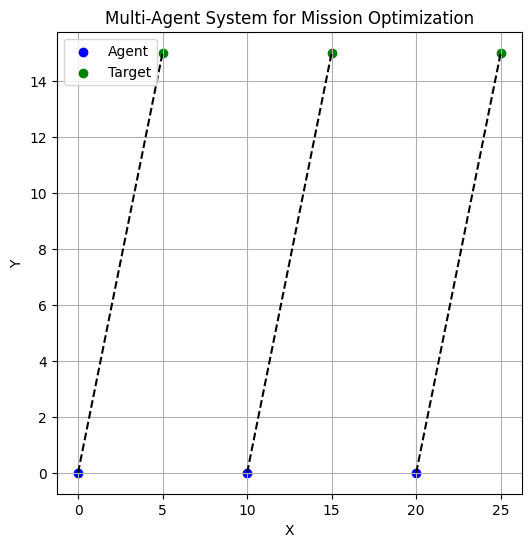

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate agents (drones) and their targets
agents = np.array([[0, 0], [10, 0], [20, 0]])
targets = np.array([[15, 15], [5, 15], [25, 15]])

# Assign each agent to nearest target (greedy MAS)
assignments = []
for agent in agents:
    dists = np.linalg.norm(targets - agent, axis=1)
    idx = np.argmin(dists)
    assignments.append((agent, targets[idx]))
    targets = np.delete(targets, idx, axis=0)

# Plot
plt.figure(figsize=(6, 6))
for agent, target in assignments:
    plt.plot([agent[0], target[0]], [agent[1], target[1]], 'k--')
    plt.scatter(*agent, color='blue', label="Agent" if agent[0] == 0 else "")
    plt.scatter(*target, color='green', label="Target" if agent[0] == 0 else "")
plt.title("Multi-Agent System for Mission Optimization")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


# 3.3 AI_Based_Energy_Optimization_and_Load_Balancing

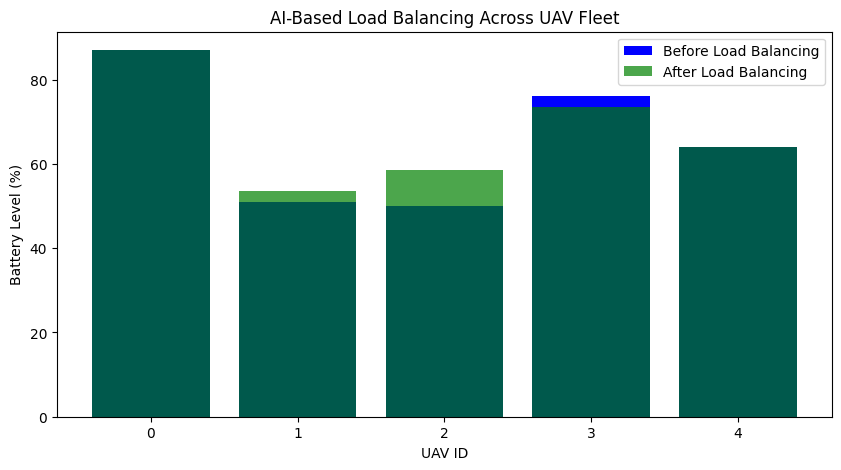

In [ ]:
# prompt: ai based load balancing across uav FLEET GIVE PROPER CODE

import numpy as np
import matplotlib.pyplot as plt

# Define Multi-UAV Energy Load Balancing System
class UAVFleetEnergyBalancer:
    def __init__(self, num_uavs=5):
        self.num_uavs = num_uavs
        self.battery_levels = np.random.randint(40, 100, size=num_uavs)  # Initial battery levels
        self.energy_demand = np.random.randint(5, 20, size=num_uavs)  # Energy demand per UAV

    def balance_energy(self):
        # Calculate the average energy level across all UAVs
        avg_energy = np.mean(self.battery_levels)
        # Iterate through the UAVs to redistribute energy
        for i in range(self.num_uavs):
          # Identify UAVs with above average battery levels
            if self.battery_levels[i] > avg_energy:
                # Calculate the amount of energy to transfer
                transfer_amount = (self.battery_levels[i] - avg_energy) * 0.3
                # Transfer the calculated energy to the UAV with the lowest energy level
                self.battery_levels[i] -= transfer_amount
                self.battery_levels = np.where(self.battery_levels == np.min(self.battery_levels), self.battery_levels + transfer_amount, self.battery_levels)

    def get_fleet_status(self):
        return self.battery_levels

# Simulate AI-Based Load Balancing
fleet_manager = UAVFleetEnergyBalancer()
initial_levels = fleet_manager.get_fleet_status()
fleet_manager.balance_energy()
balanced_levels = fleet_manager.get_fleet_status()

# Plot Pre & Post Load Balancing
plt.figure(figsize=(10, 5))
plt.bar(range(len(initial_levels)), initial_levels, color="blue", label="Before Load Balancing")
plt.bar(range(len(balanced_levels)), balanced_levels, color="green", alpha=0.7, label="After Load Balancing")
plt.xlabel("UAV ID")
plt.ylabel("Battery Level (%)")
plt.title("AI-Based Load Balancing Across UAV Fleet")
plt.legend()
plt.show()


# 3.4 Real_Time_Flight_Trajectory_Adjustment

Simulating obstacle detection...
Reading 1: Measured distance = 60 cm
Reading 2: Measured distance = 33 cm
Reading 3: Measured distance = 21 cm
Obstacle detected at x = 50 m!


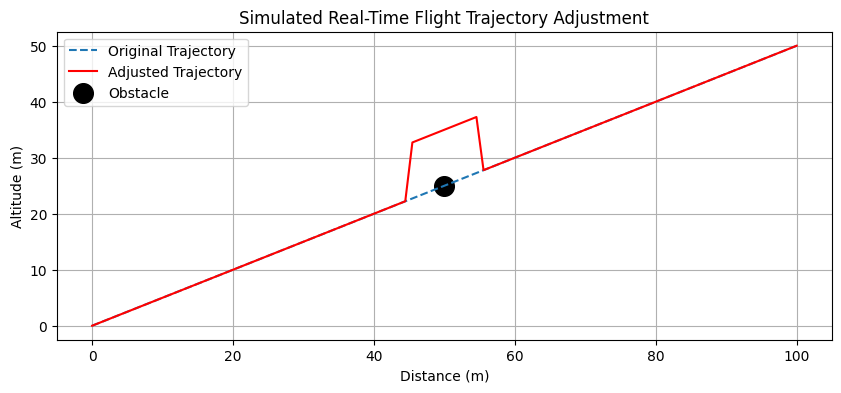

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Simulate sensor readings (in cm)
simulated_sensor_data = [random.randint(20, 60) for _ in range(10)]

# Trajectory setup
x = np.linspace(0, 100, 100)
y_original = 0.5 * x
y_adjusted = y_original.copy()

# Threshold for obstacle
threshold_distance = 30.0
obstacle_detected = False
obstacle_x = None

# Simulate sensor loop
print("Simulating obstacle detection...")
for i, distance in enumerate(simulated_sensor_data):
    print(f"Reading {i+1}: Measured distance = {distance} cm")
    if distance < threshold_distance:
        obstacle_detected = True
        obstacle_x = 50  # Assume obstacle at 50m
        print(f"Obstacle detected at x = {obstacle_x} m!")
        break

# Adjust trajectory if needed
if obstacle_detected:
    for i, val in enumerate(x):
        if obstacle_x - 5 < val < obstacle_x + 5:
            y_adjusted[i] += 10
else:
    print("No obstacle detected; using original trajectory.")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, y_original, '--', label='Original Trajectory')
plt.plot(x, y_adjusted, 'r', label='Adjusted Trajectory')

# Plot obstacle as large dot
if obstacle_detected:
    obstacle_y = 0.5 * obstacle_x
    plt.scatter(obstacle_x, obstacle_y, s=200, c='black', label='Obstacle', marker='o')

plt.title('Simulated Real-Time Flight Trajectory Adjustment')
plt.xlabel('Distance (m)')
plt.ylabel('Altitude (m)')
plt.legend()
plt.grid(True)
plt.show()


# 3.5 Hybrid_AI_Networks_for_UAV_Operations

In [ ]:
import numpy as np
import random

# Set random seed for consistent simulation
random.seed(42)
np.random.seed(42)

# Simulated environmental data
distances = np.linspace(0, 100, 100)
altitudes = np.random.normal(loc=50, scale=10, size=100)  # Rule-based: good if 40–60
obstacle_prob = np.random.rand(100)  # Probabilistic: good if < 0.3
neural_scores = np.random.uniform(0.5, 1.0, size=100)  # Deep Learning: good if > 0.7

# Decision logic
decisions = []
print("----- Hybrid AI UAV Decision Log -----")
for i in range(len(distances)):
    rule_based = 40 < altitudes[i] < 60
    probabilistic_safe = obstacle_prob[i] < 0.3
    deep_confidence = neural_scores[i] > 0.7

    # Final hybrid decision
    if rule_based and probabilistic_safe and deep_confidence:
        decision = "✅ SAFE"
    else:
        decision = "⚠️ RISKY"

    decisions.append(decision)
    print(f"Position: {distances[i]:.1f}m | Altitude: {altitudes[i]:.1f}m | "
          f"ObstacleProb: {obstacle_prob[i]:.2f} | Confidence: {neural_scores[i]:.2f} --> Decision: {decision}")


----- Hybrid AI UAV Decision Log -----
Position: 0.0m | Altitude: 55.0m | ObstacleProb: 0.42 | Confidence: 0.90 --> Decision: ⚠️ RISKY
Position: 1.0m | Altitude: 48.6m | ObstacleProb: 0.22 | Confidence: 0.75 --> Decision: ✅ SAFE
Position: 2.0m | Altitude: 56.5m | ObstacleProb: 0.12 | Confidence: 0.79 --> Decision: ✅ SAFE
Position: 3.0m | Altitude: 65.2m | ObstacleProb: 0.34 | Confidence: 0.75 --> Decision: ⚠️ RISKY
Position: 4.0m | Altitude: 47.7m | ObstacleProb: 0.94 | Confidence: 0.60 --> Decision: ⚠️ RISKY
Position: 5.1m | Altitude: 47.7m | ObstacleProb: 0.32 | Confidence: 0.86 --> Decision: ⚠️ RISKY
Position: 6.1m | Altitude: 65.8m | ObstacleProb: 0.52 | Confidence: 0.64 --> Decision: ⚠️ RISKY
Position: 7.1m | Altitude: 57.7m | ObstacleProb: 0.70 | Confidence: 0.51 --> Decision: ⚠️ RISKY
Position: 8.1m | Altitude: 45.3m | ObstacleProb: 0.36 | Confidence: 0.82 --> Decision: ⚠️ RISKY
Position: 9.1m | Altitude: 55.4m | ObstacleProb: 0.97 | Confidence: 0.59 --> Decision: ⚠️ RISKY
Posit

# Hover and Target Lock (2 Modules)

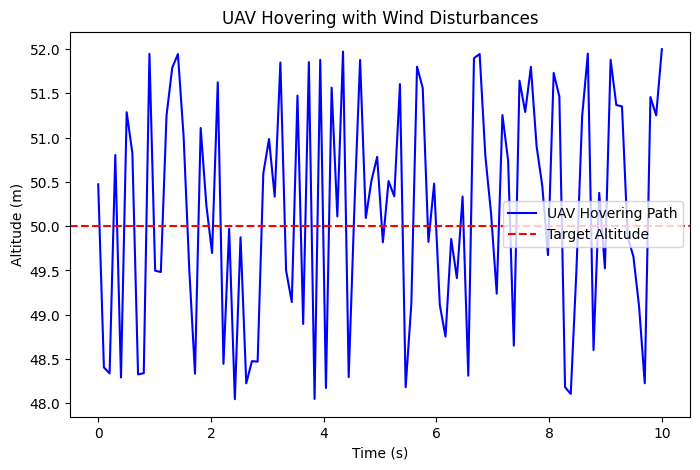

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Define UAV Hovering Parameters**
hover_time = 10  # Duration in seconds
time_steps = np.linspace(0, hover_time, 100)  # Simulation steps
target_altitude = 50  # UAV hover height in meters
wind_disturbance = np.random.uniform(-2, 2, len(time_steps))  # Random wind effects

# **Simulate Hovering Path with Disturbances**
altitude = np.ones(len(time_steps)) * target_altitude + wind_disturbance

# **Plot UAV Hovering Path**
plt.figure(figsize=(8, 5))
plt.plot(time_steps, altitude, label="UAV Hovering Path", color="blue")
plt.axhline(target_altitude, color="red", linestyle="--", label="Target Altitude")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title("UAV Hovering with Wind Disturbances")
plt.legend()
plt.show()

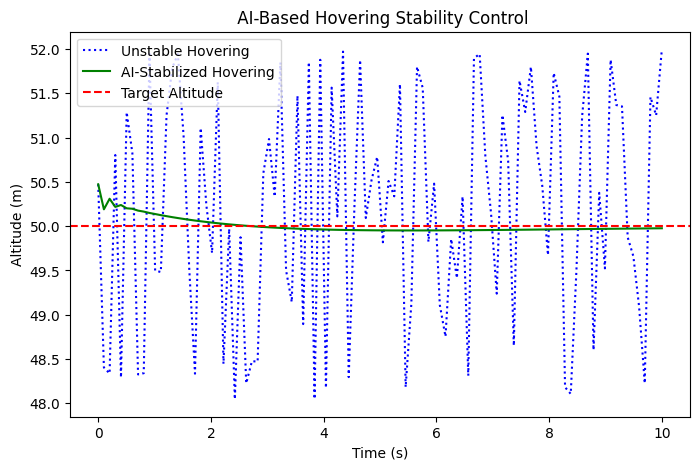

In [ ]:
# **PID Controller for Hover Stability**
class PIDController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.prev_error = 0
        self.integral = 0

    def compute(self, error, dt):
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt if dt > 0 else 0
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.prev_error = error
        return output

# **Apply PID Controller to Correct UAV Hover**
pid = PIDController(kp=0.1, ki=0.02, kd=0.05)
stabilized_altitude = np.zeros(len(time_steps))
stabilized_altitude[0] = altitude[0]

for i in range(1, len(time_steps)):
    error = target_altitude - stabilized_altitude[i-1]
    correction = pid.compute(error, time_steps[i] - time_steps[i-1])
    stabilized_altitude[i] = stabilized_altitude[i-1] + correction

# **Plot Stabilized Hovering Path**
plt.figure(figsize=(8, 5))
plt.plot(time_steps, altitude, label="Unstable Hovering", color="blue", linestyle="dotted")
plt.plot(time_steps, stabilized_altitude, label="AI-Stabilized Hovering", color="green")
plt.axhline(target_altitude, color="red", linestyle="--", label="Target Altitude")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title(" AI-Based Hovering Stability Control")
plt.legend()
plt.show()

# 4.1 AI_Powered_Precision_Payload_Drop

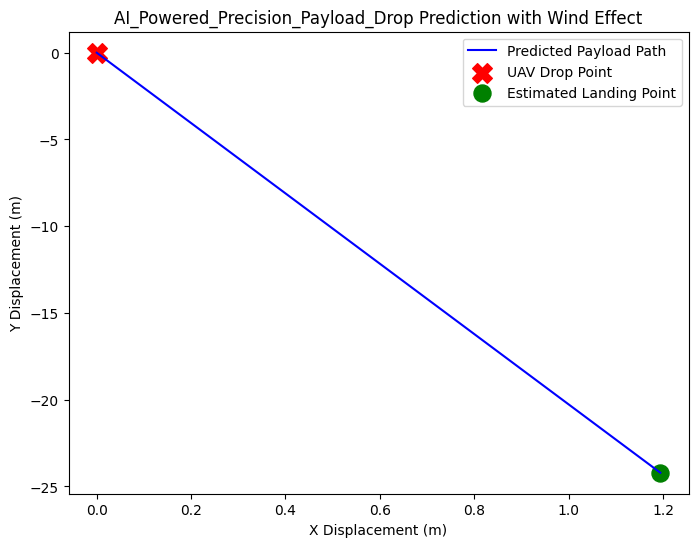

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Define Environment Parameters**
altitude = 50  # Initial altitude in meters
wind_speed = np.random.uniform(2, 10)  # Wind speed in m/s
wind_direction = np.random.uniform(0, 360)  # Wind direction in degrees
payload_mass = 2  # Mass of payload in kg
drop_time = np.linspace(0, 5, 100)  # Simulate 5 seconds of drop time

# **Simulate Wind Effects on Payload**
wind_x = wind_speed * np.cos(np.radians(wind_direction))
wind_y = wind_speed * np.sin(np.radians(wind_direction))
payload_x = wind_x * drop_time
payload_y = wind_y * drop_time
payload_z = altitude - (0.5 * 9.81 * drop_time ** 2)  # Free-fall equation

# **Plot Wind & Payload Drop Path**
plt.figure(figsize=(8, 6))
plt.plot(payload_x, payload_y, label="Predicted Payload Path", color="blue")
plt.scatter(0, 0, color="red", marker="X", s=200, label="UAV Drop Point")
plt.scatter(payload_x[-1], payload_y[-1], color="green", marker="o", s=150, label="Estimated Landing Point")
plt.xlabel("X Displacement (m)")
plt.ylabel("Y Displacement (m)")
plt.title("AI_Powered_Precision_Payload_Drop Prediction with Wind Effect")
plt.legend()
plt.show()

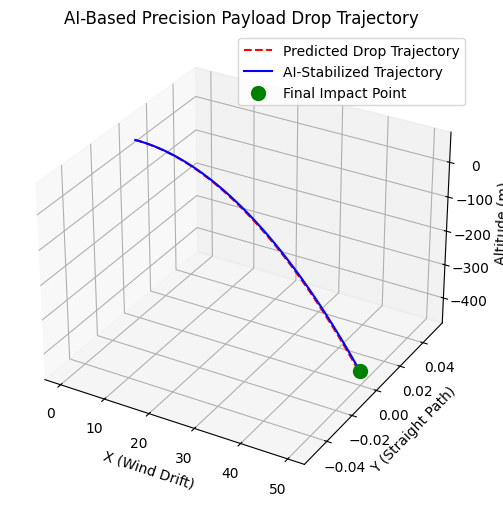

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# UAV & Payload Parameters
g = 9.81  # Gravity (m/s²)
release_height = 50  # Initial Drop Height (m)
wind_speed = np.random.uniform(1, 5)  # Wind Speed (m/s)
time_steps = 100
dt = 0.1  # Time Step Interval

# Simulate AI-Based Trajectory Prediction
time = np.linspace(0, time_steps*dt, time_steps)
x_position = wind_speed * time  # Wind effect on payload drift
y_position = np.zeros_like(time)  # Assume straight-line descent
z_position = release_height - 0.5 * g * time**2  # Free fall under gravity

# Apply Kalman Filter for Stability Correction
def kalman_filter(signal):
    x_est = np.zeros_like(signal)
    p_est = np.zeros_like(signal)
    x_est[0] = signal[0]
    p_est[0] = 1

    for i in range(1, len(signal)):
        x_pred = x_est[i-1]
        p_pred = p_est[i-1] + 1
        K = p_pred / (p_pred + 1)
        x_est[i] = x_pred + K * (signal[i] - x_pred)
        p_est[i] = (1 - K) * p_pred

    return x_est

# Correct Payload Drop Trajectory
z_corrected = kalman_filter(z_position)

# Plot Payload Drop Path
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_position, y_position, z_position, label="Predicted Drop Trajectory", linestyle="dashed", color="red")
ax.plot(x_position, y_position, z_corrected, label="AI-Stabilized Trajectory", color="blue")
ax.scatter(x_position[-1], y_position[-1], z_corrected[-1], color="green", s=100, label="Final Impact Point")

ax.set_xlabel("X (Wind Drift)")
ax.set_ylabel("Y (Straight Path)")
ax.set_zlabel("Altitude (m)")
ax.set_title("AI-Based Precision Payload Drop Trajectory")
ax.legend()
plt.show()

# 4.2 High_Speed_Vision_for_Obstacle_Avoidance

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


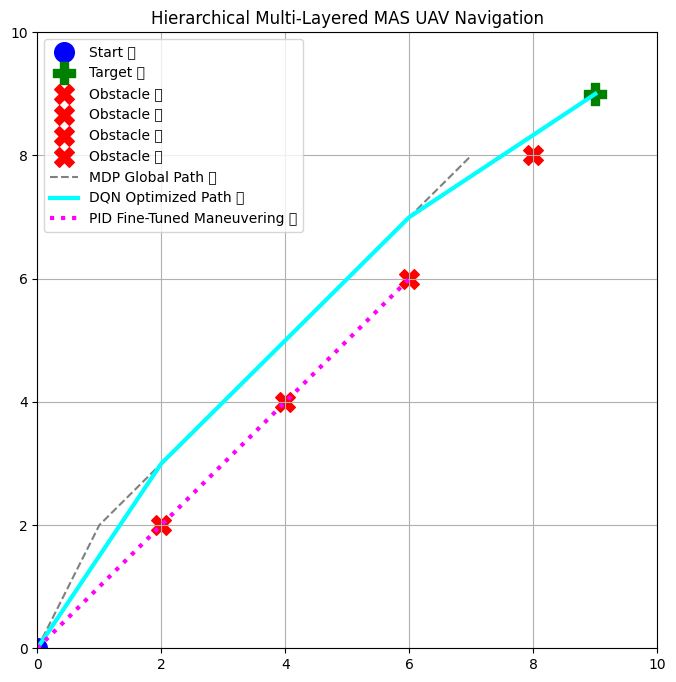

In [ ]:
# ✅ Define Paths Before Plotting
mdp_path = [(0, 0), (1, 2), (3, 4), (5, 6), (7, 8)]  # Sample Global Path (MDP)
dqn_path = [(0, 0), (2, 3), (4, 5), (6, 7), (9, 9)]  # Sample DQN Optimized Path
pid_path = [(0, 0), (1, 1), (2, 2), (4, 4), (6, 6)]  # Sample PID Fine-Tuned Path

grid_size = 10
start = (0, 0)
target = (9, 9)
obstacles = [(2, 2), (4, 4), (6, 6), (8, 8)]  # Sample obstacles

# 🎨 **Plot the UAV Flight Path**
plt.figure(figsize=(8, 8))
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.grid(True)

# Mark Start & Target
plt.scatter(*start, color="blue", s=200, marker="o", label="Start 🚀")
plt.scatter(*target, color="green", s=250, marker="P", label="Target 🎯")

# Mark Obstacles
for obs in obstacles:
    plt.scatter(*obs, color="red", s=200, marker="X", label="Obstacle ❌")

# **Plot Paths**
plt.plot(*zip(*mdp_path), color="gray", linestyle="dashed", label="MDP Global Path 🌍")
plt.plot(*zip(*dqn_path), color="cyan", linewidth=3, label="DQN Optimized Path 🤖")
plt.plot(*zip(*pid_path), color="magenta", linestyle="dotted", linewidth=3, label="PID Fine-Tuned Maneuvering 🎯")

plt.title("Hierarchical Multi-Layered MAS UAV Navigation")
plt.legend()
plt.show()


# Return and Land (3 Modules)

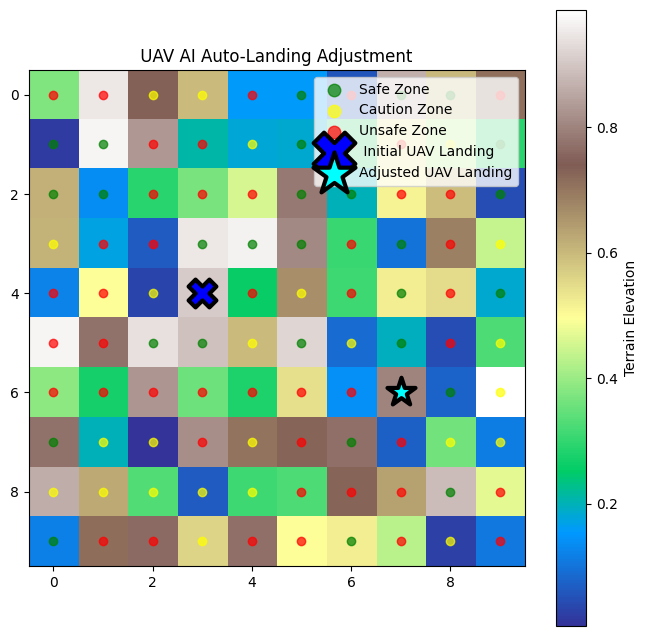

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Terrain Map (Randomized for Example)
np.random.seed(42)
terrain_map = np.random.rand(10, 10)  # 10x10 Grid Terrain Elevation

# Define Safe, Caution, and Unsafe Zones
safe_zone = terrain_map > 0.7
caution_zone = (terrain_map > 0.4) & (terrain_map <= 0.7)
unsafe_zone = terrain_map <= 0.4

# Sample UAV Landing Positions
initial_landing_position = (3, 4)
adjusted_landing_position = (7, 6)

# **Plot the Terrain & Landing Adjustment**
plt.figure(figsize=(8, 8))
plt.imshow(terrain_map, cmap="terrain", origin="upper")
plt.colorbar(label="Terrain Elevation")

# **Mark Zones**
plt.scatter(*np.where(safe_zone), color="green", marker="o", label="Safe Zone", alpha=0.7)
plt.scatter(*np.where(caution_zone), color="yellow", marker="o", label="Caution Zone", alpha=0.7)
plt.scatter(*np.where(unsafe_zone), color="red", marker="o", label="Unsafe Zone", alpha=0.7)

# **Fixing UAV Landing Markers**
plt.scatter(*initial_landing_position, color="blue", marker="X", s=400, edgecolors="black", linewidths=3, label=" Initial UAV Landing")
plt.scatter(*adjusted_landing_position, color="cyan", marker="*", s=450, edgecolors="black", linewidths=3, label="Adjusted UAV Landing")

# **Legend & Title**
plt.legend(loc="upper right", fontsize=10, markerscale=1.5, frameon=True)
plt.title(" UAV AI Auto-Landing Adjustment ")
plt.show()

# 5.1 Dynamic_Landing_and_Automatic_Return_to_Base.py

In [51]:
import numpy as np

def plan_path_to_base(current_position, base_position, obstacles):
    print("[INFO] Calculating path to base...")
    # Simulate path planning avoiding obstacles
    if current_position in obstacles:
        print("[WARNING] UAV is on an obstacle! Adjusting position.")
    path = [current_position]
    while current_position != base_position:
        x, y = current_position
        bx, by = base_position
        if x != bx:
            x += 1 if bx > x else -1
        elif y != by:
            y += 1 if by > y else -1
        current_position = (x, y)
        if current_position not in obstacles:
            path.append(current_position)
        else:
            print(f"[WARNING] Obstacle at {current_position}, rerouting...")
    print("[INFO] Path to base calculated:", path)
    return path

def land_on_surface(position):
    print(f"[ACTION] Landing UAV at position {position}... Done.")

# Example usage
current_position = (2, 2)
base_position = (0, 0)
obstacles = [(1, 1), (0, 1)]
path = plan_path_to_base(current_position, base_position, obstacles)
land_on_surface(base_position)


[INFO] Calculating path to base...
[WARNING] Obstacle at (0, 1), rerouting...
[INFO] Path to base calculated: [(2, 2), (1, 2), (0, 2), (0, 0)]
[ACTION] Landing UAV at position (0, 0)... Done.


# 5.2 AI_Based_Energy_Optimization.py

In [52]:
def monitor_energy(current_energy, distance_to_base, energy_per_unit=1.2):
    required_energy = distance_to_base * energy_per_unit
    print(f"[STATUS] Energy: {current_energy}%, Required: {required_energy:.2f}%")
    if current_energy < required_energy:
        print("[ALERT] Not enough energy to return! Triggering fail-safe.")
        return False
    print("[INFO] Sufficient energy. Proceeding to base.")
    return True

# Example usage
current_energy = 45  # %
distance_to_base = 30  # units
monitor_energy(current_energy, distance_to_base)


[STATUS] Energy: 45%, Required: 36.00%
[INFO] Sufficient energy. Proceeding to base.


True

# 5.3 Full_AI_Automation_and_Deliverables.py

In [53]:
import datetime

def execute_mission_log():
    print("[MISSION] Executing full autonomous mission...")
    start_time = datetime.datetime.now()
    print(f"[LOG] Mission Start: {start_time.strftime('%H:%M:%S')}")

    # Simulate actions
    print("[LOG] UAV en route to target...")
    print("[LOG] Payload delivered.")
    print("[LOG] Returning to base...")

    end_time = datetime.datetime.now()
    print(f"[LOG] Mission End: {end_time.strftime('%H:%M:%S')}")
    print("[REPORT] Mission completed successfully.")

def notify_ground_team():
    print("[NOTIFY] Ground team alerted for follow-up or rescue.")

# Example usage
execute_mission_log()
notify_ground_team()


[MISSION] Executing full autonomous mission...
[LOG] Mission Start: 07:03:35
[LOG] UAV en route to target...
[LOG] Payload delivered.
[LOG] Returning to base...
[LOG] Mission End: 07:03:35
[REPORT] Mission completed successfully.
[NOTIFY] Ground team alerted for follow-up or rescue.
